In [27]:
#Multiple Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [18]:
df_index = pd.read_csv("economic_index.csv")

In [19]:
df_index.head(5)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [23]:
#Dropping unneccessary columns
df_index.drop(columns= ["Unnamed: 0", "year","month"], axis = 1, inplace = True)

In [24]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [26]:
#Check if null values in any series
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

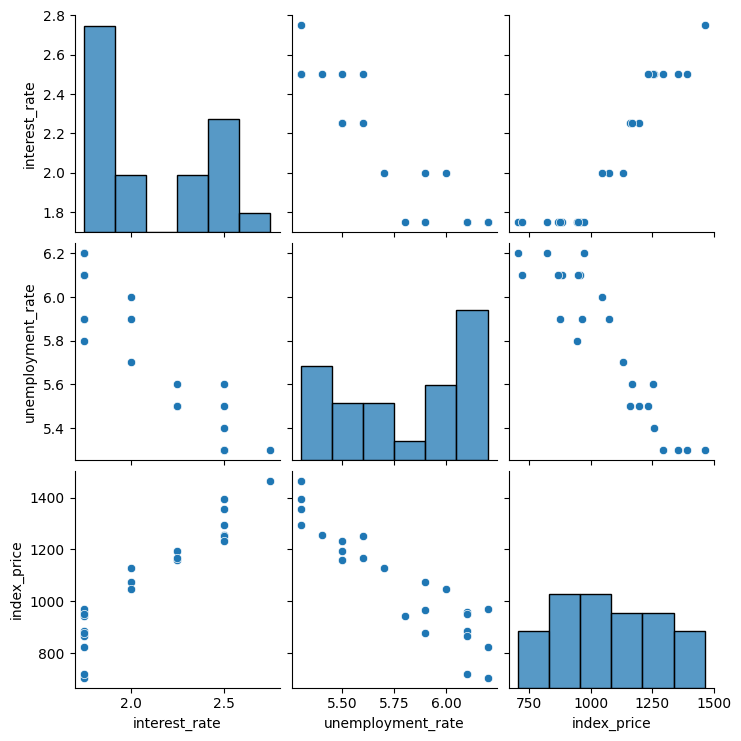

In [28]:
#Some Visualizations
sns.pairplot(df_index)

In [29]:
df_index.corr()   

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemp Rate')

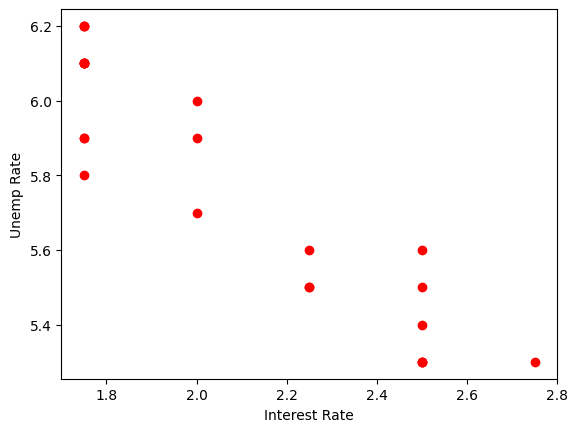

In [30]:
#Viz data points more closely
plt.scatter(df_index["interest_rate"], df_index["unemployment_rate"], color = 'r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemp Rate")



<Axes: xlabel='interest_rate', ylabel='index_price'>

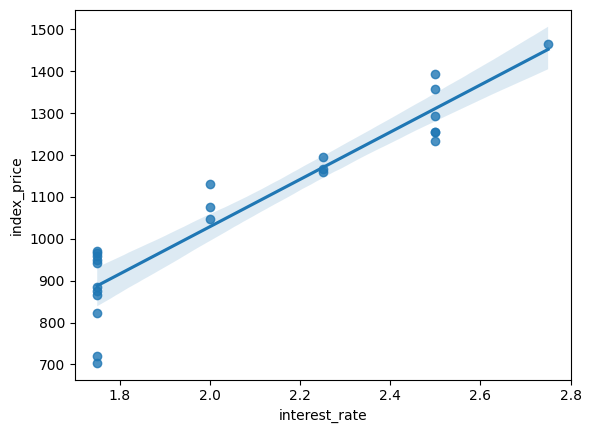

In [46]:
sns.regplot(x=df_index["interest_rate"], y=df_index["index_price"])


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

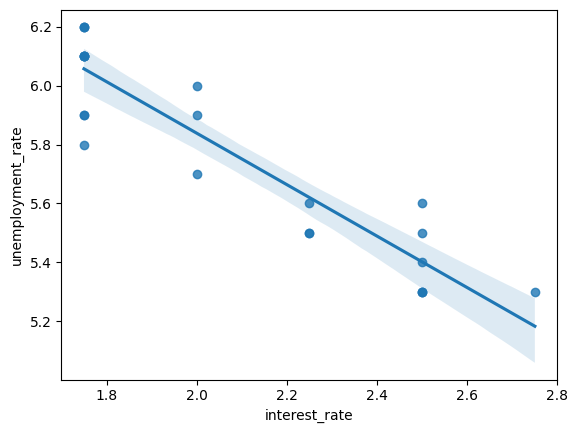

In [47]:
sns.regplot(x=df_index["interest_rate"], y=df_index["unemployment_rate"])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

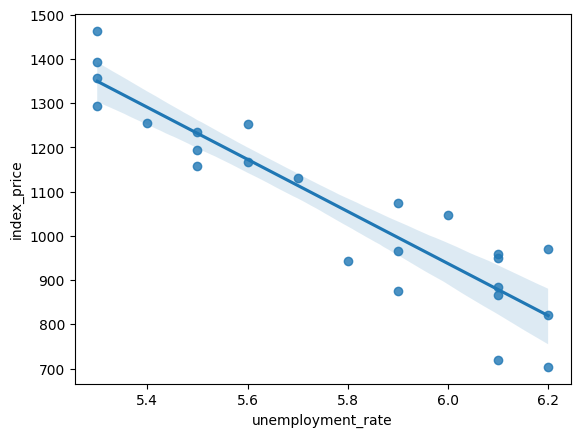

In [48]:
sns.regplot(x=df_index["unemployment_rate"], y=df_index["index_price"])

In [ ]:
#Extracting independet and dependent features
X= df_index[["interest_rate", "unemployment_rate"]]
### X= df_index.iloc[::,-1]
y= df_index["index_price"]


In [39]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [40]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [41]:
#Train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

In [50]:
#Applying z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [53]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [54]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [56]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train, scoring="neg_mean_squared_error", cv= 3 )

In [57]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [58]:
validation_score.mean()

-5914.828180162386

In [59]:
#Prediction
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [61]:
#Preformance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


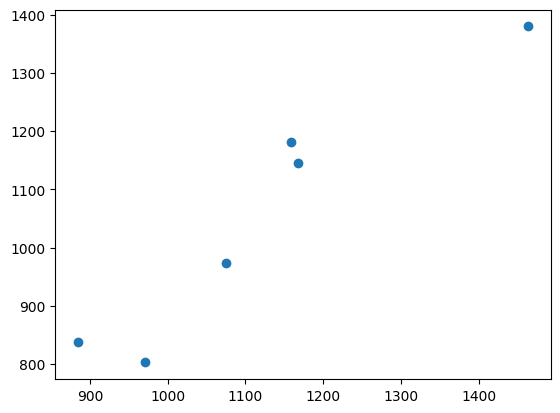

In [62]:
#Assumptions
plt.scatter(y_test,y_pred)



In [63]:
residuals = y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


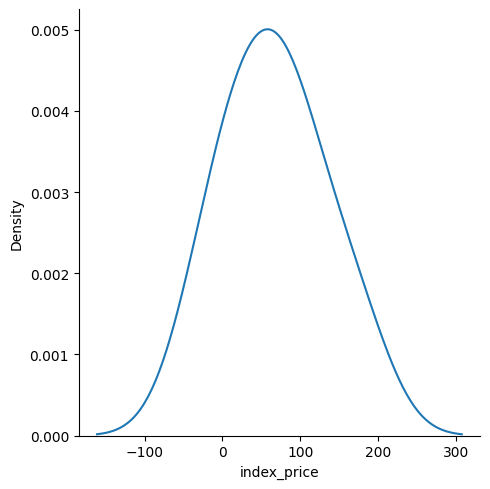

In [65]:
sns.displot(residuals, kind='kde')
#below is a normal dist graph

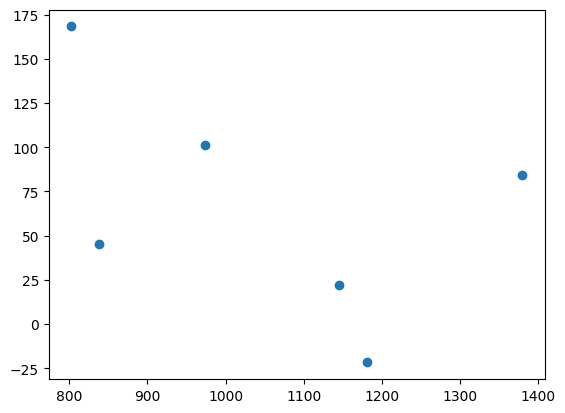

In [66]:
#scatter plot wrt prediction and residuals
plt.scatter(y_pred, residuals)

#uniform distribution in below graph